In [1]:
%matplotlib inline
# Load the "autoreload" extension
%load_ext autoreload
# always reload modules
%autoreload 2
# black formatter for jupyter notebooks
#%load_ext nb_black
# black formatter for jupyter lab
%load_ext lab_black

%run ../../src/notebook_env.py


---------------------------------
Working on the host: Joachims-MacBook-Pro.local

---------------------------------
Python version: 3.10.2 | packaged by conda-forge | (main, Feb  1 2022, 19:30:18) [Clang 11.1.0 ]

---------------------------------
Python interpreter: /opt/miniconda3/envs/srh/bin/python


## Der Mittelwert und die Standardabweichung einer diskreten Zufallsvariablen

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

### Mittelwert einer diskreten Zufallsvariable

Der Mittelwert einer **diskreten Zufallsvariablen** $X$ wird mit $\mu_X$ oder, wenn keine Verwechslung auftreten soll, einfach mit $\mu$ bezeichnet. Die Begriffe **Erwartungswert**, $E(X)$ und **Erwartung** werden üblicherweise anstelle des Begriffs Mittelwert verwendet.

$$E(X) = \sum_{i=1}^{N}x_iP(X=x_i)$$

Bei einer großen Anzahl unabhängiger Beobachtungen einer Zufallsvariablen $X$ nähert sich $E(X)$ dieser Beobachtungen - der Stichprobe - dem Mittelwert $\mu$ der Grundgesamtheit an. Je größer die Zahl der Beobachtungen ist, desto näher liegt $E(X)$ an $\mu$ ({cite:p}`fahrmeirstatistik` s.226).

Erinnern wir uns an unser Experiment aus dem vorherigen Abschnitt, als wir $1.000$ Personen ausgewählt und nach der Anzahl der Geschwister gefragt haben. Werfen wir noch einmal einen Blick auf die Tabelle, die das Experiment zusammenfasst

\begin{array}{c|lcr}
\text{Geschwister} & \text{Häufigkeit} & \text{Relative}\\
\ x & f & \text{Häufigkeit}\\
\hline
0 & 205 & 0.205  \\
1 & 419 & 0.419  \\
2 & 280 & 0.28 \\
3 & 65 & 0.065  \\
4 & 29 & 0.029  \\
5 & 2 & 0.002 \\
\hline
 & 1000 & 1
\end{array}

Berechnen wir den Erwartungswert (Mittelwert) für dieses Experiment.

\begin{align}
\\ 
& E(X) = \sum_{i=1}^{N}x_iP(X=x_i) \\
& = 0 \cdot P(X=0) + 1 \cdot P(X=1)+ 2 \cdot P(X=2) + 3 \cdot P(X=3) +4 \cdot P(X=4)+ 5 \cdot P(X \ge 5) \\
& = 0 \cdot 0,205 + 1 \cdot 0,419 + 2 \cdot 0,28+ 3 \cdot 0,065  + 4 \cdot 0,029  + 5 \cdot 0,002  \\
& = 1,3
\end{align}

Der sich daraus ergebende Erwartungswert von $1,3$ liegt nahe am Mittelwert $\mu$, den wir anhand der Wahrscheinlichkeiten der Grundgesamtheit berechnen (die realen Wahrscheinlichkeiten sind der unteren rechten Abbildung im vorherigen Abschnitt entnommen).

$$\mu = 1 \cdot 0,2 + 2 \cdot 0,425 +  3 \cdot 0,275 + 4 \cdot 0,07 + 5 \cdot 0,025=1,31$$

### Übung

Betrachten wir einen fairen sechsseitigen Würfel. Wir können den **Erwartungswert** $E(X)$ leicht mit Python berechnen. Der Begriff "fair" bedeutet, dass jede Zufallsvariable $X=x_i,\; x \in 1,2,3,4,5,6$ mit gleicher Wahrscheinlichkeit auftritt. Daher ist $P(X=x_i)=\frac{1}{6}$.

$$E(X) = \sum_{i=1}^{6}x_iP(X=x_i) = 1 \cdot \frac{1}{6} + 2 \cdot \frac{1}{6} +  3 \cdot \frac{1}{6} +  4 \cdot \frac{1}{6} + 5 \cdot \frac{1}{6} + 6 \cdot \frac{1}{6}= 3,5$$

In Python schreiben wir den folgenden Code:

In [3]:
p_die = 1 / 6
die = pd.Series([1, 2, 3, 4, 5, 6])
die = die * p_die
sum(die)

3.5

Was aber, wenn wir uns nicht sicher sind, ob die Würfel wirklich fair sind? Woher wissen wir, dass wir nicht betrogen werden? Oder anders ausgedrückt: Wie oft müssen wir würfeln, bevor wir mehr Vertrauen haben können?

Führen wir ein Berechnungsexperiment durch: Wir wissen aus den obigen Überlegungen, dass der Erwartungswert eines $6$-seitigen fairen Würfels $3,5$ ist. Wir führen ein Experiment durch, indem wir einen Würfel immer und immer wieder werfen. Wir speichern das Ergebnis und bevor wir erneut würfeln, berechnen wir den Durchschnitt aller bisherigen Würfelwürfe. Um dieses kleine Experiment durchzuführen, schreiben wir eine for-Schleife in Python.

In [50]:
[random.randint(1, 6) for x in range(1000)]

1000

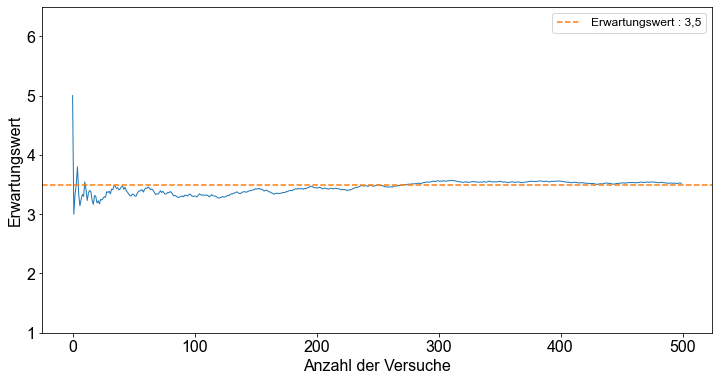

In [62]:
# Setze random seed für Reproduzierbarkeit
random.seed(10)
wuerfel = []
e_wert = []
# Simuliere Würfelwurf
for i in range(500):
    r = random.randint(1, 6)
    wuerfel.append(r)
    e_wert.append(np.mean(wuerfel))
# Plotten
fig, ax = plt.subplots()
ax.plot(x, e_wert, lw=1)
ax.axhline(y=3.5, color="C1", linestyle="dashed", label="Erwartungswert : 3,5")
ax.set_xlabel("Anzahl der Versuche")
ax.set_ylabel("Erwartungswert")
ax.set_ylim(1, 6.5)
ax.legend()

Das Diagramm zeigt, dass die Kurve nach anfänglichen Schwankungen schließlich abflacht und sich dem $E(X)$ von $3,5$ annähert.

### Standardabweichung einer diskreten Zufallsvariable

Die Standardabweichung einer diskreten Zufallsvariablen $X$ wird mit $\sigma_X$ oder, wenn keine Verwechslung auftreten soll, einfach mit $\sigma$ bezeichnet. Sie ist definiert als

$$\sigma = \sqrt{\sum_{i=1}^{N}(x_i-\mu)^2P(X=x_i)}$$